In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

In [10]:
k_map={
    ' US.':1,
    ' Europe.':2,
    ' Japan.':3
}

In [28]:
df=pd.read_csv('cars.csv')
df['category']=df[' brand'].map(k_map)
df=df.drop(columns=[' brand'])
df=df.dropna(how='any')
df[' cubicinches']=df[' cubicinches'].replace([' '],rd.randint(100,450))
df[' cubicinches']=df[' cubicinches'].astype(int)
df[' weightlbs']=df[' weightlbs'].replace([' '],rd.randint(1900,4500))
df[' weightlbs']=df[' weightlbs'].astype(int)
display(df)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,category
0,14.0,8,350,165,4209,12,1972,1
1,31.9,4,89,71,1925,14,1980,2
2,17.0,8,302,140,3449,11,1971,1
3,15.0,8,400,150,3761,10,1971,1
4,30.5,4,98,63,2051,17,1978,1
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,1
257,36.1,4,91,60,1800,16,1979,3
258,22.0,6,232,112,2835,15,1983,1
259,18.0,6,232,100,3288,16,1972,1


In [29]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

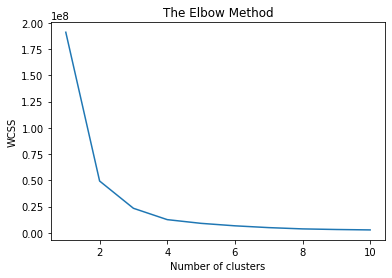

In [32]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_pred=kmeans.fit_predict(X)

In [34]:
y_pred

array([0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2,
       2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2,
       1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 0,
       2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 0, 2,
       0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 2, 2, 2],
      dtype=int32)

In [35]:
from sklearn import metrics
metrics.adjusted_rand_score(Y,y_pred)

0.08962769354317637

In [36]:
metrics.adjusted_mutual_info_score(Y,y_pred)

0.20942418319757303